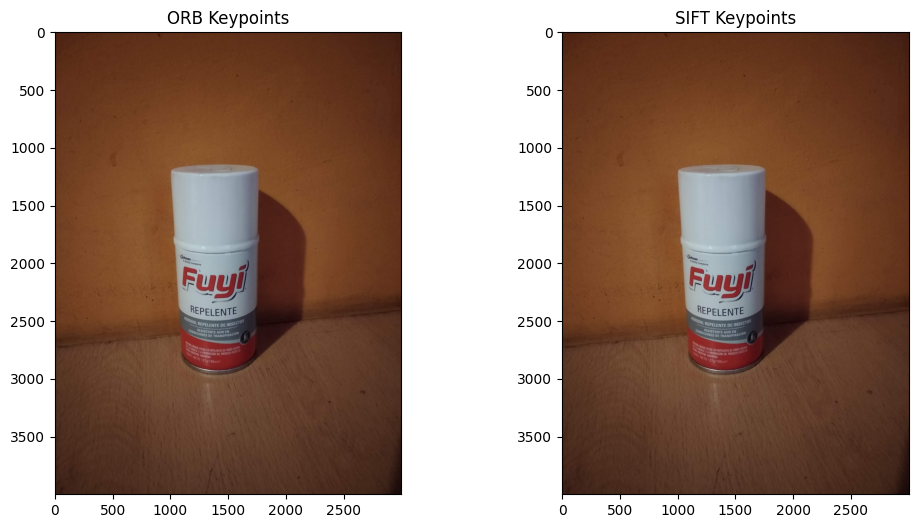

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Cargar la imagen
image = cv2.imread('/content/drive/MyDrive/TUIA/5º cuatrimestre/Visión por computadora/fotos_practica/IMG_20240321_161120.jpg')

# Convertir la imagen a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Usar matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('ORB Keypoints')

plt.subplot(1, 2, 2)
plt.imshow(image_rgb
           )
plt.title('SIFT Keypoints')

plt.show()

In [ ]:
r,g,b = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]

In [ ]:
b

array([[19, 19, 19, ..., 18, 18, 18],
       [18, 18, 18, ..., 18, 18, 18],
       [18, 18, 18, ..., 18, 18, 18],
       ...,
       [24, 24, 24, ..., 13, 13, 13],
       [24, 24, 24, ..., 13, 13, 13],
       [24, 24, 24, ..., 13, 13, 13]], dtype=uint8)

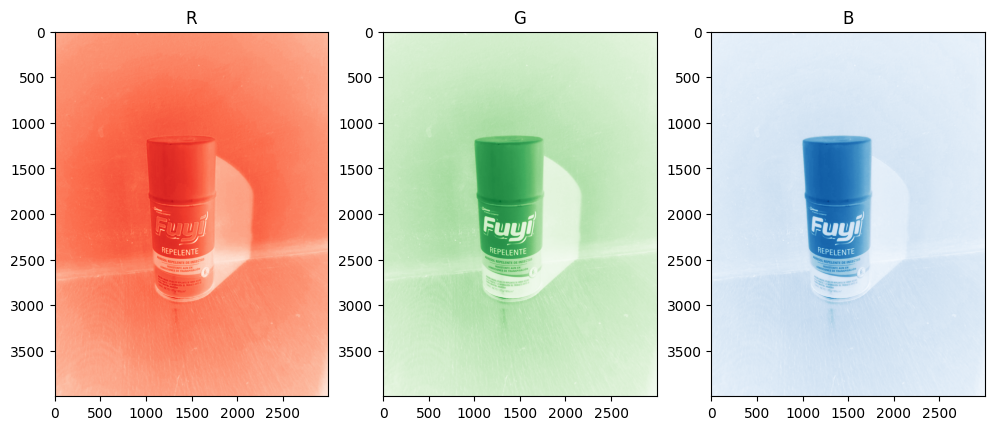

In [ ]:
# Usar matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(r,cmap='Reds')
plt.title('R')
plt.subplot(1, 3, 2)
plt.imshow(g,cmap='Greens')
plt.title('G')
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title('B')

plt.show()

In [ ]:
# Convertir la imagen a RGB
image_gr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

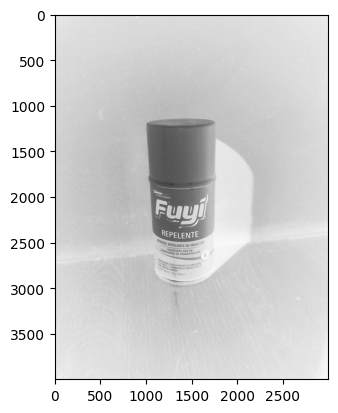

In [ ]:
# Usar matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_gr, cmap='Greys')

In [ ]:
img = cv2.imread('/content/drive/MyDrive/TUIA/5º cuatrimestre/Visión por computadora/fotos_practica/IMG_20240321_161120.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp,img)

cv2.imwrite('sift_keypoints.jpg',img)

True

In [ ]:
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)

True

In [ ]:
img = cv2.imread('/content/drive/MyDrive/TUIA/5º cuatrimestre/Visión por computadora/fotos_practica/IMG_20240321_161332.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints2.jpg',img)


True

-1

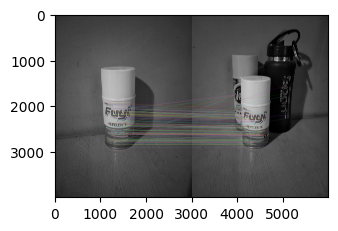

In [61]:
from __future__ import print_function
import cv2 as cv
import numpy as np
img1=cv.imread('/content/drive/MyDrive/TUIA/5º cuatrimestre/Visión por computadora/fotos_practica/IMG_20240321_161120.jpg',cv.IMREAD_GRAYSCALE)
img2=cv.imread('/content/drive/MyDrive/TUIA/5º cuatrimestre/Visión por computadora/fotos_practica/IMG_20240321_161303.jpg',cv.IMREAD_GRAYSCALE)



if img1 is None or img2 is None:
  print('Could not open or find the images!')
  exit(0)
#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
minHessian = 400
detector = cv.SIFT_create()
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
  if m.distance < ratio_thresh * n.distance:
    good_matches.append(m)
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, img_matches, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Show detected matches
# Usar matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_matches, cmap='Greys')

cv.imwrite('finish.jpg',img_matches)

cv.waitKey()

In [58]:
cv.imwrite('finish.jpg',img_matches)


True